   Jahr  Bruttomonatsverdienst pro Monat (EUR)
6  2018                                   3880
5  2019                                   3994
4  2020                                   3975
3  2021                                   4100
2  2022                                   4244
1  2023                                   4479
0  2024                                   4701


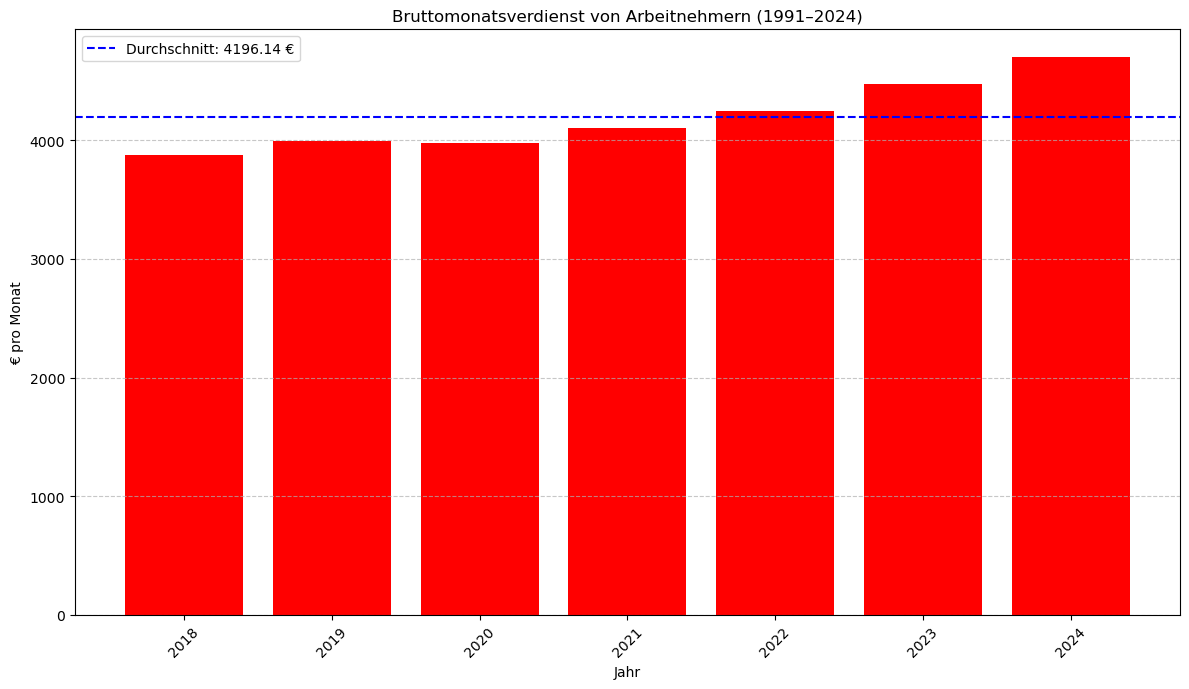

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Excel-Datei und Blattname
datei = "data/Bruttomonatsverdienst_Arbeitnehmern_1991-2024.xlsx"
blatt = "Daten"

# Daten einlesen und überspringt die ersten 5 Zeilen
df = pd.read_excel(datei, sheet_name=blatt, header=None, skiprows=5)

# Spalten 1 (Jahr) und 2 (Bruttomonatsverdienst)
df = df.iloc[:, [1, 2]]
df.columns = ['Jahr', 'Bruttomonatsverdienst pro Monat (EUR)']


# Zeilen mit fehlenden Werten entfernen
df = df.dropna()

# Filterung
df = df[(df['Jahr'] >= 2018) & (df['Jahr'] <= 2024)]

# Sortieren
df = df.sort_values(by='Jahr', ascending=True)

# Ausgabe
print(df)

# Durchschnitt berechnen
durchschnitt = df['Bruttomonatsverdienst pro Monat (EUR)'].mean()

# Daten speichern
df.to_excel("tabellen/bruttomonatsverdienst_arbeitnehmer.xlsx", index=False)
df.to_csv("tabellen/bruttomonatsverdienst_arbeitnehmer.csv", index=False, sep=';')

# Diagramm erstellen
plt.figure(figsize=(12, 7))
plt.bar(df['Jahr'], df['Bruttomonatsverdienst pro Monat (EUR)'], color='red')
plt.title('Bruttomonatsverdienst von Arbeitnehmern (1991–2024)')
plt.xlabel('Jahr')
plt.ylabel('€ pro Monat')
plt.xticks(rotation=45)  # Dreht die Jahreszahlen für bessere Lesbarkeit
plt.grid(axis='y', linestyle='--', alpha=0.7) # Hilfslinien
plt.tight_layout()  # Layout automatisch anpassen

# Durchschnittslinie hinzufügen
plt.axhline(durchschnitt, color='blue', linestyle='--', label=f'Durchschnitt: {durchschnitt:.2f} €')

# Legende anzeigen
plt.legend()

plt.savefig("bilder/bruttomonatsverdienst_1991-2024_balken.png")
plt.show()
